In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv("heart.csv")

# Initial Analysis

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [5]:
df.columns = new_columns

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- The data set consist of 303 rows and 14 columns
- The type of all the variable are Numeric (int or float)
- There are no missing values in the dataset

# Preparing for EDA

## Examining Missing Values

In [8]:
df1 = df.isnull().sum().to_frame()
df1.columns = ["No. of Missing Values"]
df1

,No. of Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


## Examining Unique Values

In [9]:
df1 = df.nunique().to_frame()
df1.columns = ["No. of Unique Values"]
df1

,No. of Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [10]:
numeric_var = ["age", "trtbps","chol","thalach","oldpeak"]
categorical_var=[ "sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

#  EDA : Uni - Variate Analysis

## Numeric Variable Analysis

In [11]:
axis_name = ["Age of patients","Resting Blood Presuer","cholestrol","Maximum Heart Rate achieved","ST Depression"]

In [12]:
list(zip(numeric_var , axis_name))

[('age', 'Age of patients'),
 ('trtbps', 'Resting Blood Presuer'),
 ('chol', 'cholestrol'),
 ('thalach', 'Maximum Heart Rate achieved'),
 ('oldpeak', 'ST Depression')]

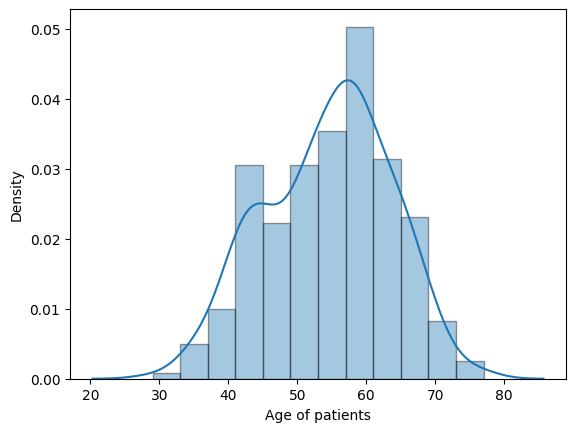

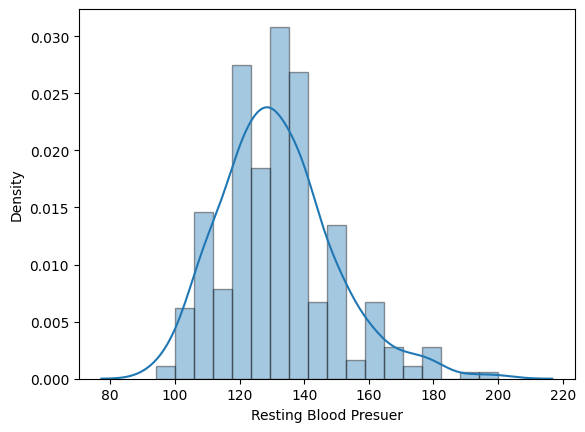

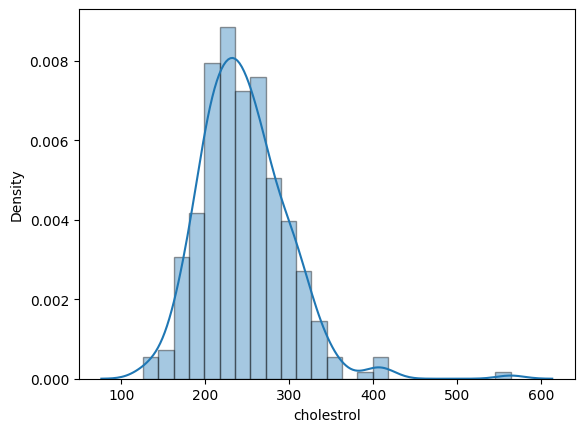

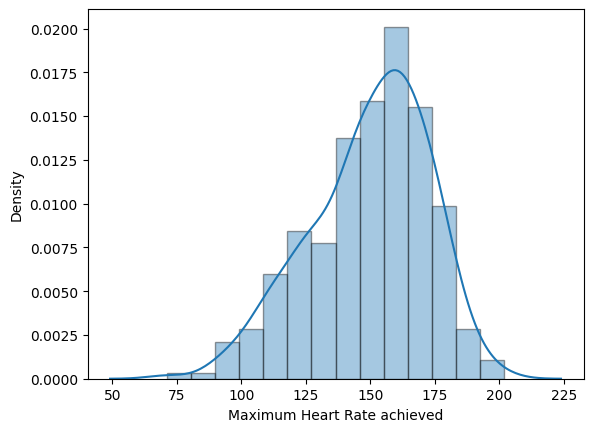

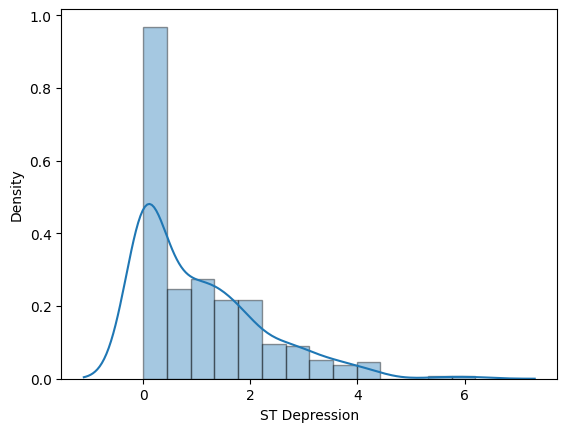

In [13]:
for i,z in list(zip(numeric_var , axis_name)):
    sns.distplot(df[i],hist_kws = dict(linewidth=1,edgecolor="k"))
    plt.xlabel(z)
    plt.show()

In [14]:
axis_name1 = [ "Gender","Chest Pain Type","Fasting Blood Sugar","Resting ECG","Exercise Induced Angia","The slope of ST segment","Number of major vessels","Thal","target"]

## Categorical Variable Analysis

In [15]:
list(zip(categorical_var,axis_name1))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting ECG'),
 ('exang', 'Exercise Induced Angia'),
 ('slope', 'The slope of ST segment'),
 ('ca', 'Number of major vessels'),
 ('thal', 'Thal'),
 ('target', 'target')]

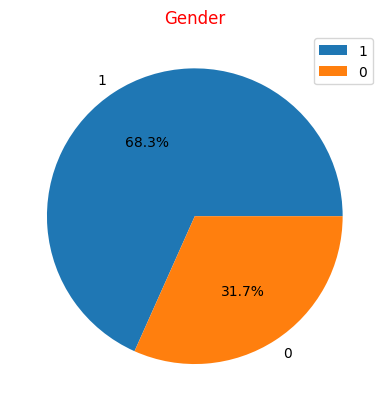

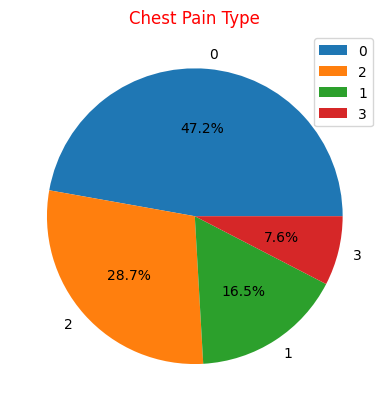

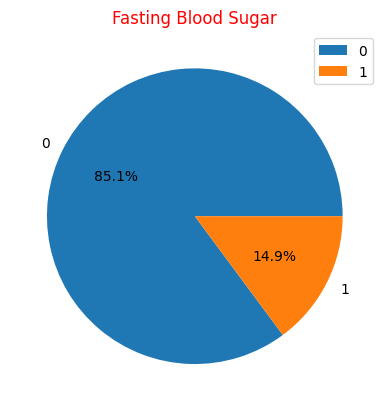

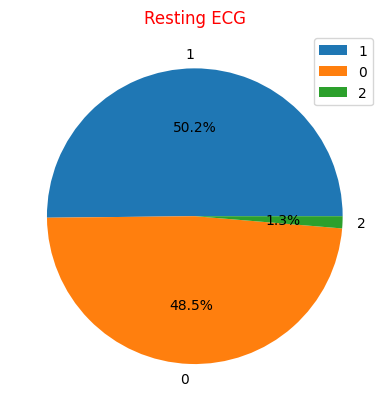

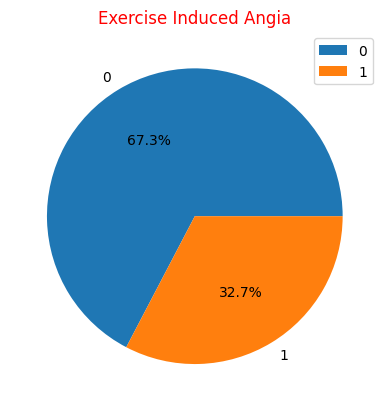

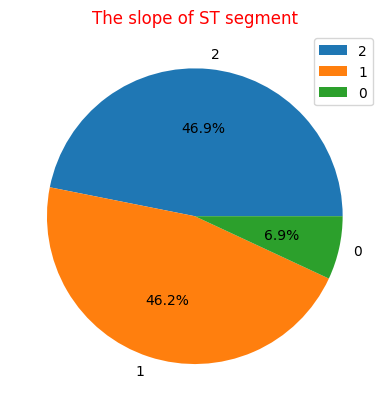

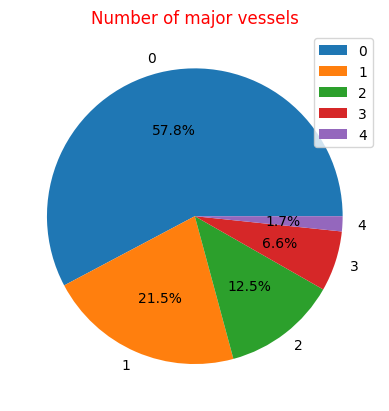

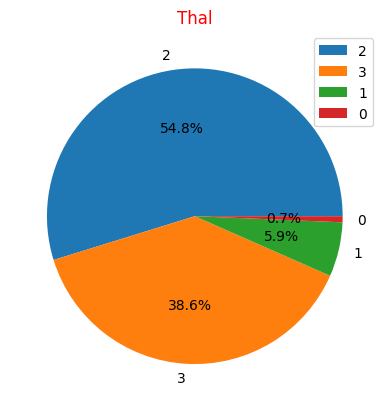

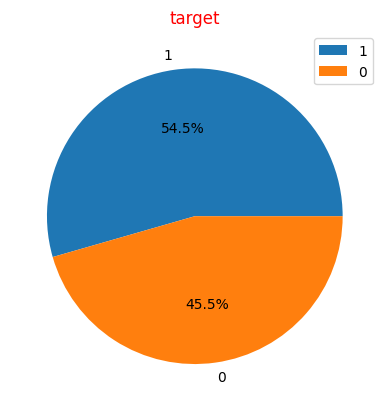

In [16]:

for i,z in list(zip(categorical_var,axis_name1)):
    fig,ax=plt.subplots()
    data = df[i].value_counts()
    labels = df[i].value_counts().index
    ax.pie(data,labels=labels,autopct="%1.1f%%")
    plt.title(z,color="r")
    plt.legend()
    plt.show()

# Filling missing values

according to kaggel 0 in thal variable are Nan values

In [17]:
df[df["thal"] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [18]:
df["thal"] = df["thal"].replace(0,np.nan)

In [19]:
df1 = df.isnull().sum().to_frame()
df1.columns = ["No. of Missing Values"]
df1

,No. of Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [20]:
df["thal"]=df["thal"].fillna(2)

In [21]:
df1 = df.isnull().sum().to_frame()
df1.columns = ["No. of Missing Values"]
df1

,No. of Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


# EDA : Bi-Variate Analysis

## Numeric Variable - Target Variable : Analysis with FaceGrid

In [22]:
numeric_var.append('target')

In [23]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

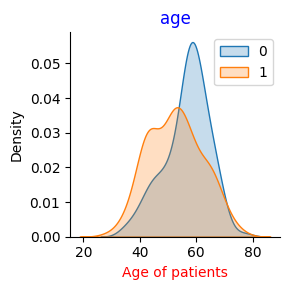

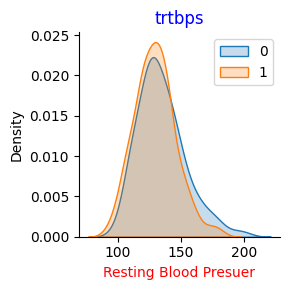

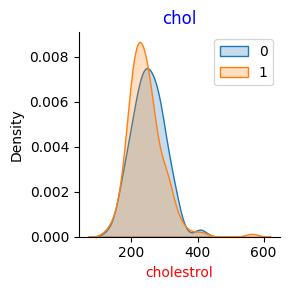

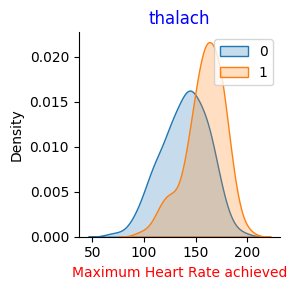

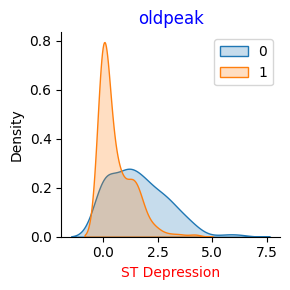

In [24]:
for i,z in list(zip(numeric_var , axis_name)):
    graph = sns.FacetGrid(df[numeric_var],hue="target")
    graph.map(sns.kdeplot,i,shade=True)
    plt.xlabel(z,color="r")
    plt.title(i,color="b")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [25]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [26]:
df[numeric_var].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


## Categoric Variables - Target Variable (Analysis with count plot)

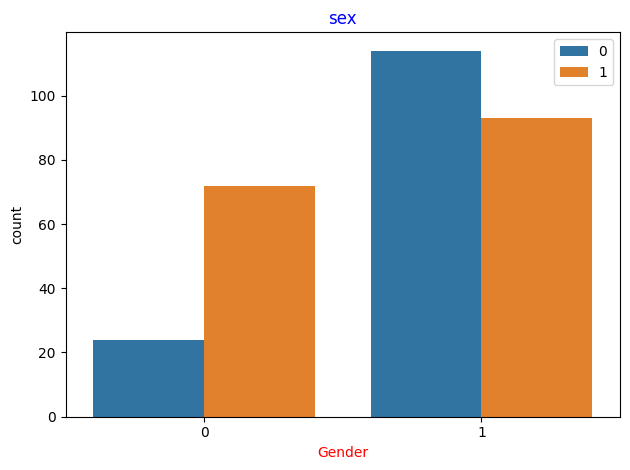

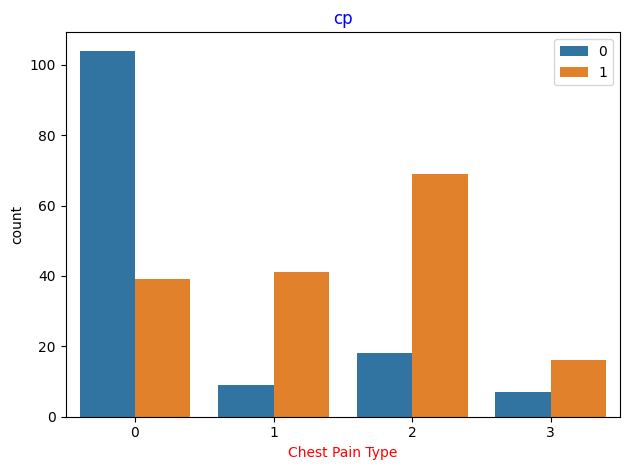

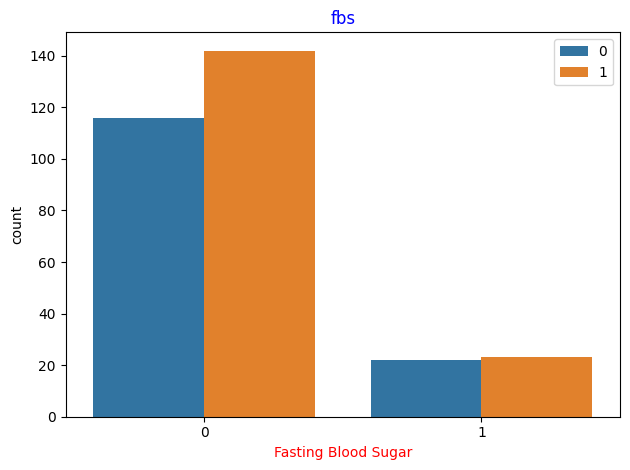

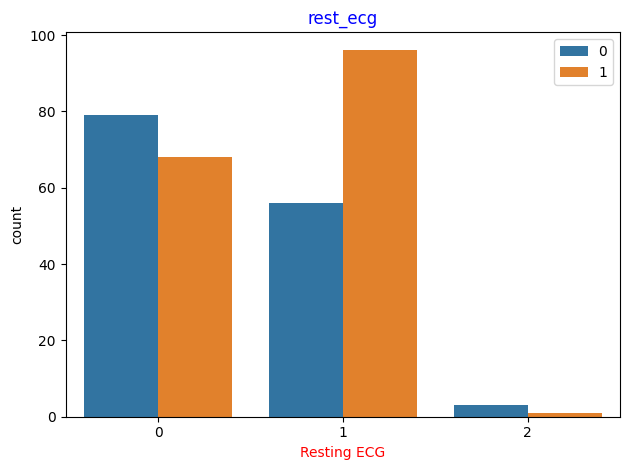

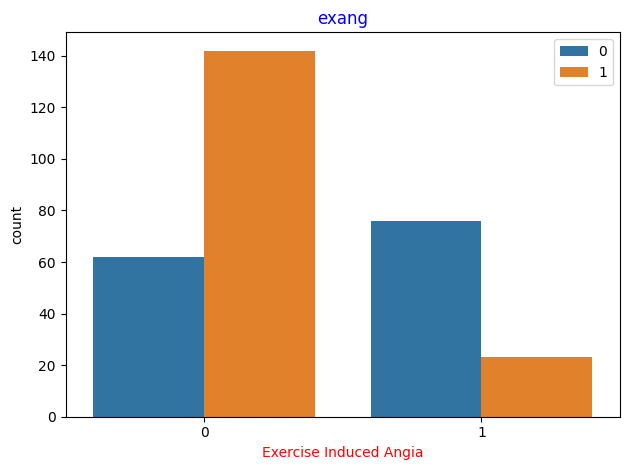

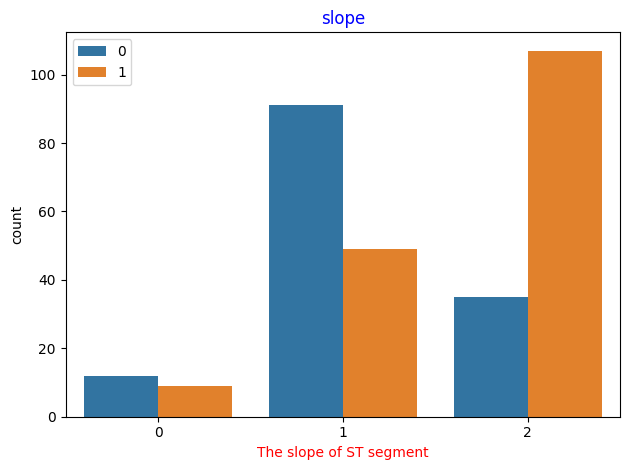

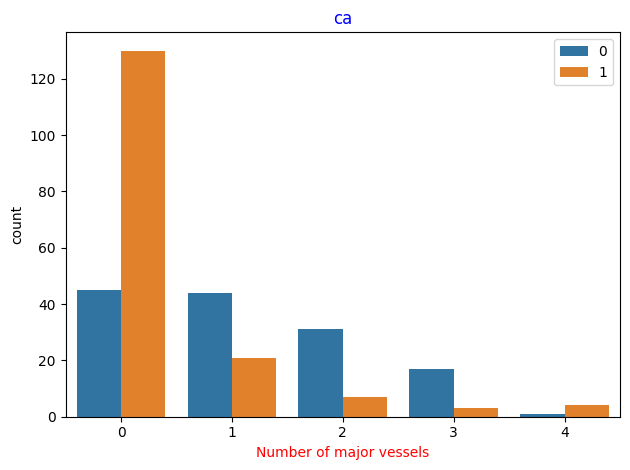

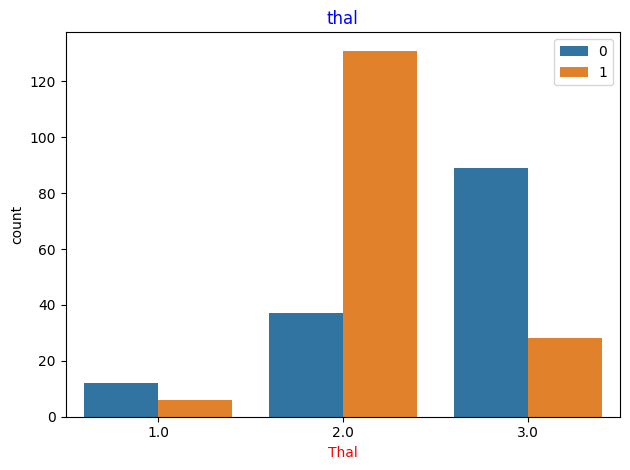

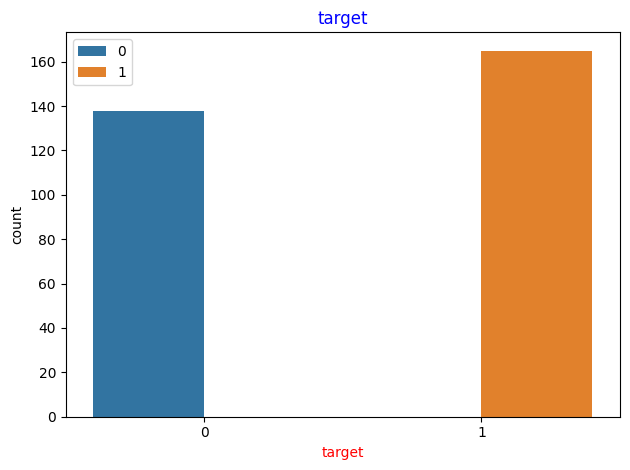

In [27]:
for i,z in list(zip(categorical_var, axis_name1)):
    sns.countplot(df[categorical_var],x=i,hue="target")
    plt.xlabel(z,color="r")
    plt.title(i,color="b")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [28]:
df[categorical_var].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [29]:
df[categorical_var].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


In [30]:
## Feature Scaling with Robust scaler

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
robust_scaler = RobustScaler()

In [33]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [34]:
df_scaled = pd.DataFrame(scaled_data,columns=numeric_var)

## 13. Relationships between variables (Analysis with Heatmap)

In [35]:
df_new2=pd.concat([df_scaled,df[categorical_var]],axis=1)

In [36]:
df_new2.head()

,age,trtbps,chol,thalach,oldpeak,target,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,0.0,1,3,1,0,0,0,0,1.0,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,0.0,1,2,0,1,0,0,0,2.0,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0.0,0,1,0,0,0,2,0,2.0,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0.0,1,1,0,1,0,2,0,2.0,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0.0,0,0,0,1,1,2,0,2.0,1


In [37]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,target,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,-0.280937,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,0.433798,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,-0.028046,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,0.137230,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230


<Axes: >

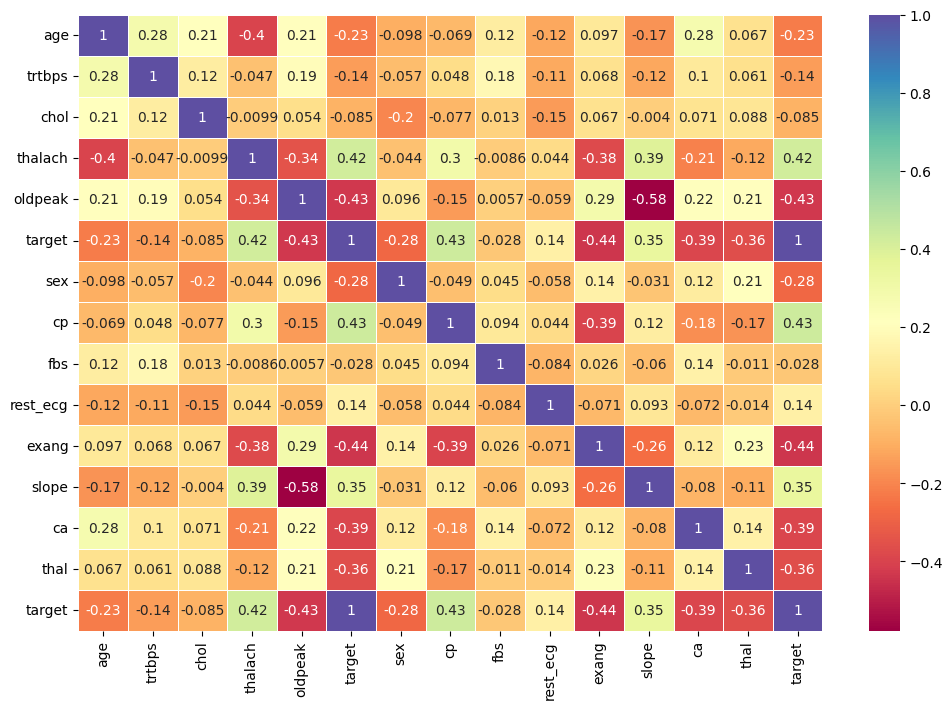

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_new2.corr(),annot=True,cmap='Spectral',lw=.5)

## Dropping Columns with Low Correlation

In [39]:
df.drop(['chol','fbs','rest_ecg'],axis=1,inplace=True)

In [40]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1.0,1
1,37,1,2,130,187,0,3.5,0,0,2.0,1
2,41,0,1,130,172,0,1.4,2,0,2.0,1
3,56,1,1,120,178,0,0.8,2,0,2.0,1
4,57,0,0,120,163,1,0.6,2,0,2.0,1


## Visualizing Outliers

Text(0.5, 1.0, 'oldpeak')

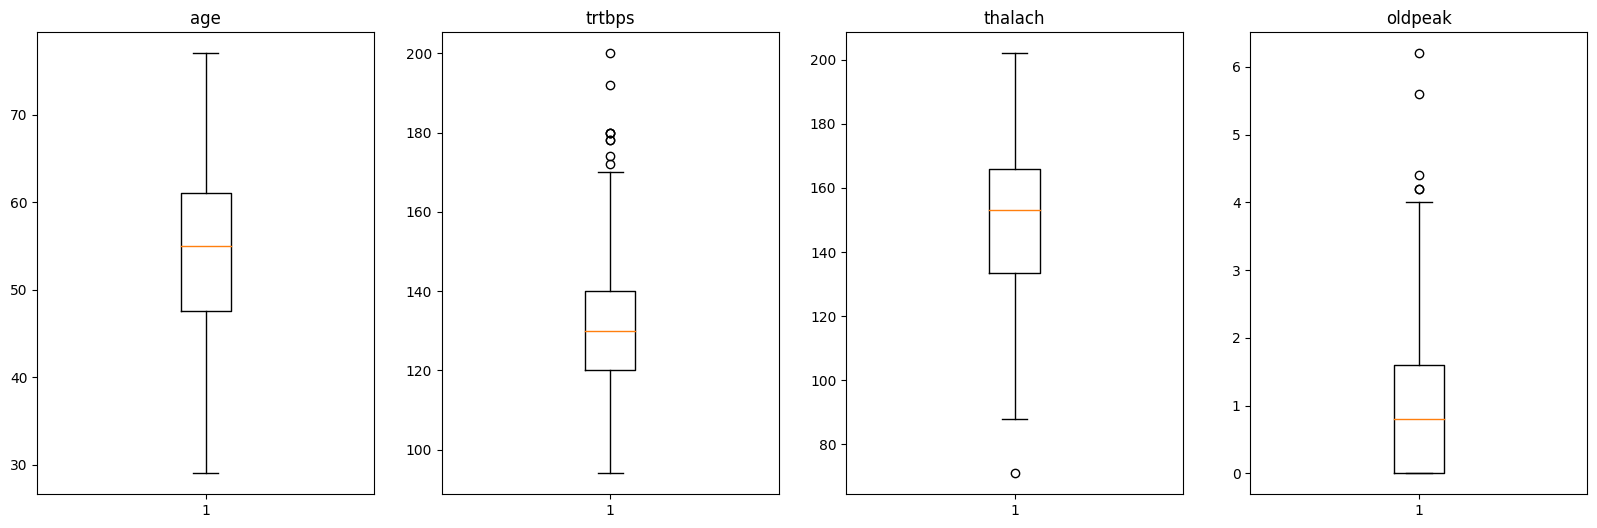

In [41]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

## Dealing with Outliers – Trtbps Variable

In [42]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [43]:
z_scores_trtbps = zscore(df["trtbps"])

In [44]:
# zscore is only used for normal distribution

In [45]:
for threshold in range(1,4):
    print(f"Threshold Value; {threshold}")
    print(f"Number of Outliers: {len(np.where(z_scores_trtbps>threshold)[0])}")
    print("-------------------------------")

Threshold Value; 1
Number of Outliers: 51
-------------------------------
Threshold Value; 2
Number of Outliers: 13
-------------------------------
Threshold Value; 3
Number of Outliers: 2
-------------------------------


In [46]:
df[z_scores_trtbps>2][['trtbps']]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [47]:
df[z_scores_trtbps>2].trtbps.min()

170

In [48]:
df[df['trtbps']<170].trtbps.max()

165

In [49]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"],165))/100

In [50]:
winsorize_percentile_trtbps

0.957095709570957

In [51]:
1 -winsorize_percentile_trtbps

0.04290429042904298

In [52]:
trtbps_winsorized = winsorize(df.trtbps,(0,1 -winsorize_percentile_trtbps))

In [53]:
df["trtbps_winsorized"]  = trtbps_winsorized

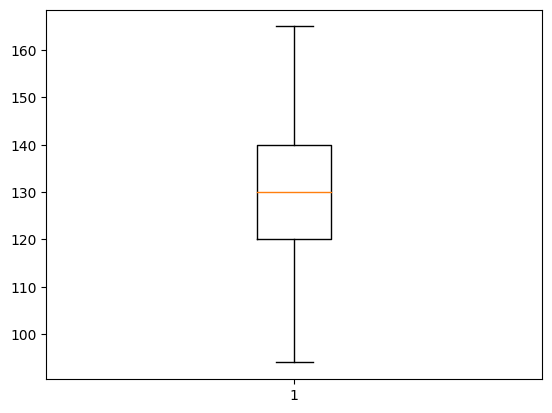

In [54]:
plt.boxplot(df["trtbps_winsorized"])
plt.show()

In [55]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorized
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120


## Dealing with Outliers – Thalach Variable

In [56]:
# since thalach is not normally disributed so we will use iqr for this

In [57]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 =np.quantile(df[var],0.75)
    diff = q3-q1
    lower_v= q1 - (1.5*diff)
    upper_v = q3 + (1.5*diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [58]:
thalach_out = iqr(df,"thalach")

In [59]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorized
272,67,1,0,120,71,0,1.0,1,0,2.0,0,120


In [60]:
df.drop([272],axis=0,inplace=True)

In [61]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorized
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120


## Dealing with Outliers – Oldpeak Variable

In [62]:
iqr(df,"oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorized
101,59,1,3,178,145,0,4.2,0,0,3.0,1,165
204,62,0,0,160,145,0,6.2,0,3,3.0,0,160
221,55,1,0,140,111,1,5.6,0,0,3.0,0,140
250,51,1,0,140,122,1,4.2,1,3,3.0,0,140
291,58,1,0,114,140,0,4.4,0,3,1.0,0,114


In [63]:
df[df["oldpeak"]<4.2].oldpeak.max()

4.0

In [64]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["trtbps"],165))/100

In [65]:
oldpeak_winsorized = winsorize(df.oldpeak,(0,1 -winsorize_percentile_oldpeak))

In [66]:
df["oldpeak_winsorized"] = oldpeak_winsorized

In [67]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorized,oldpeak_winsorized
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120,0.6


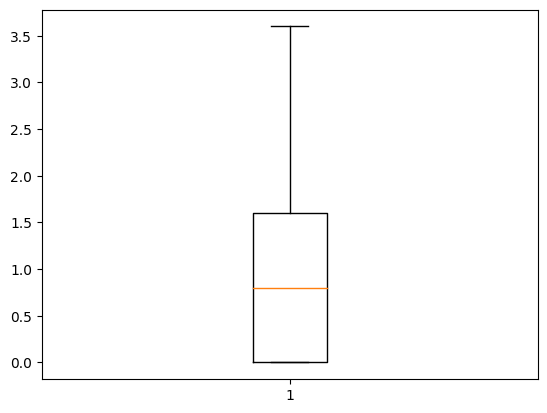

In [68]:
plt.boxplot(df["oldpeak_winsorized"]);

## Determining Distributions of Numeric Variables

Text(0.5, 1.0, 'oldpeak_winsorized')

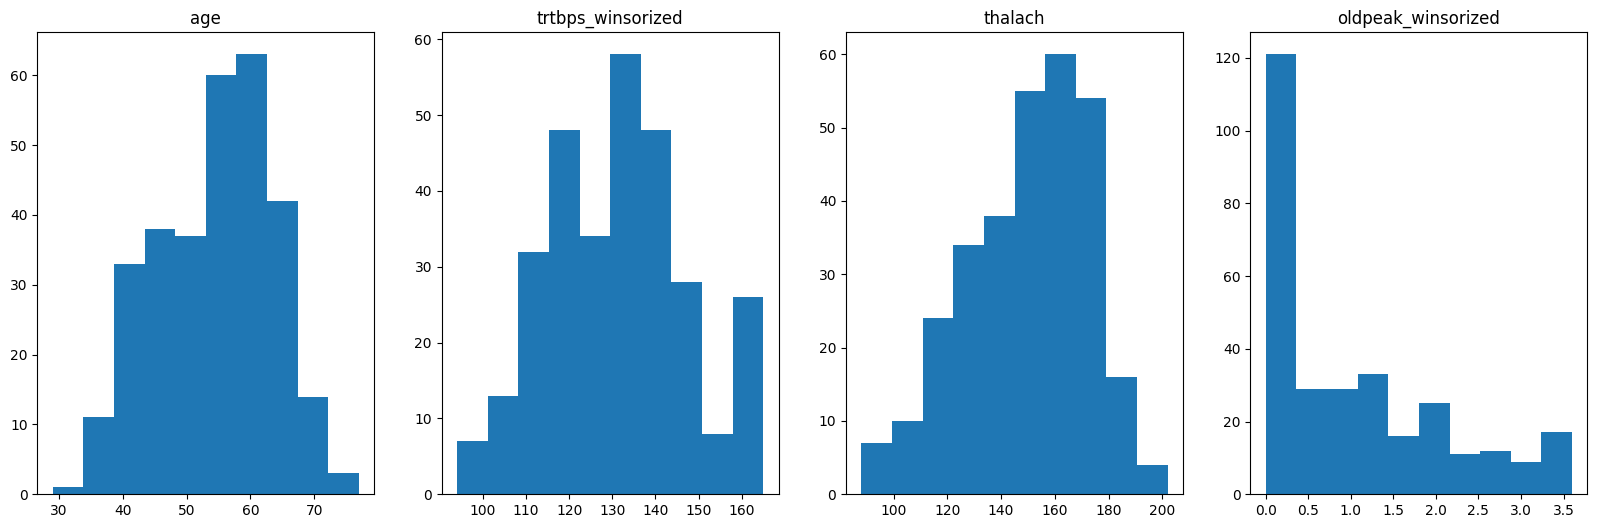

In [69]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorized"])
ax2.set_title("trtbps_winsorized")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorized"])
ax4.set_title("oldpeak_winsorized")

In [70]:
df[["age","thalach","trtbps_winsorized","oldpeak_winsorized"]].agg(["skew"]).T

,skew
age,-0.199209
thalach,-0.461611
trtbps_winsorized,0.251969
oldpeak_winsorized,0.902155


In [71]:
# -0.5 to 0.5 almost normally distributed
# -1 to -0.5 and 0.5 to 1 moderately skewed
# less than -1 or greater than 1 very skewed distribution

## Transformation Operations on Unsymmetrical Data

In [72]:
df["oldpeak_winsorized_log"] = np.log(df["oldpeak_winsorized"])

In [73]:
df["oldpeak_winsorized_sqrt"] = np.sqrt(df['oldpeak_winsorized'])

In [74]:
df[["oldpeak_winsorized_log","oldpeak_winsorized_sqrt","oldpeak_winsorized"]].agg(["skew"]).T

,skew
oldpeak_winsorized_log,-0.933883
oldpeak_winsorized_sqrt,0.080394
oldpeak_winsorized,0.902155


In [75]:
df.drop(["oldpeak_winsorized_log","oldpeak_winsorized"],axis=1,inplace=True)

In [76]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorized,oldpeak_winsorized_sqrt
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145,1.516575
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130,1.870829
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130,1.183216
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120,0.894427
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120,0.774597


## Applying One Hot Encoding Method to Categorical Variables

In [77]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorized,oldpeak_winsorized_sqrt
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145,1.516575
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130,1.870829
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130,1.183216
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120,0.894427
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120,0.774597


In [78]:
df.drop(["trtbps","oldpeak"],axis=1,inplace=True)

In [79]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorized,oldpeak_winsorized_sqrt
0,63,1,3,150,0,0,0,1.0,1,145,1.516575
1,37,1,2,187,0,0,0,2.0,1,130,1.870829
2,41,0,1,172,0,2,0,2.0,1,130,1.183216
3,56,1,1,178,0,2,0,2.0,1,120,0.894427
4,57,0,0,163,1,2,0,2.0,1,120,0.774597


In [80]:
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [81]:
categorical_var.remove("fbs")
categorical_var.remove("rest_ecg")

In [82]:
df=pd.get_dummies(df,columns=categorical_var[:-1],drop_first=True)

## Feature Scaling with the Robust Scaler Method

In [83]:
from sklearn.preprocessing import RobustScaler

In [84]:
rs = RobustScaler()

In [85]:
numeric_var = ['age', 'trtbps_winsorized', 'thalach', 'oldpeak_winsorized_sqrt']

In [86]:
df[numeric_var] = rs.fit_transform(df[numeric_var])

In [87]:
df.head()

,age,thalach,target,trtbps_winsorized,oldpeak_winsorized_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2.0,thal_3.0
0,0.581818,-0.095238,1,0.75,0.491851,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.309091,1.079365,1,0.00,0.771913,True,False,True,False,False,False,False,False,False,False,False,True,False
2,-1.018182,0.603175,1,0.00,0.228308,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0.072727,0.793651,1,-0.50,0.000000,True,True,False,False,False,False,True,False,False,False,False,True,False
4,0.145455,0.317460,1,-0.50,-0.094734,False,False,False,False,True,False,True,False,False,False,False,True,False


## Separating Data into Test and Training Set

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x = df.drop("target",axis=1)

In [90]:
y = df["target"]

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=3)

## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
log_reg = LogisticRegression()

In [94]:
log_reg.fit(xtrain,ytrain)

LogisticRegression()

In [95]:
ypred= log_reg.predict(xtest)

In [96]:
acc = accuracy_score(ypred,ytest)

In [97]:
print(f"Accuracy score for Logistic Regression: {acc}")

Accuracy score for Logistic Regression: 0.8709677419354839


## Cross Validation

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
scores = cross_val_score(log_reg,xtest,ytest,cv=10)

In [100]:
print(f"Cross validation score: {scores.mean()}")

Cross validation score: 0.8666666666666666


## Hyperparameter Optimization (with GridSearchCV)

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
log_reg1= LogisticRegression()

In [103]:
parameter={
    "penalty":["l1","l2"],
    "solver":["newton-cg","lbfgs","liblinear","sag","saga"]
}

In [104]:
log_reg_grid = GridSearchCV(log_reg1,param_grid=parameter)

In [105]:
log_reg_grid.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [106]:
log_reg_grid.best_params_

{'penalty': 'l1', 'solver': 'saga'}

In [107]:
log_reg_tuned=LogisticRegression(penalty = 'l1', solver= 'saga')

In [108]:
log_reg_tuned.fit(xtrain,ytrain)

LogisticRegression(penalty='l1', solver='saga')

In [109]:
ypred=log_reg_tuned.predict(xtest)

In [110]:
accuracy_score(ypred,ytest)

0.8709677419354839

## Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc = RandomForestClassifier()

In [113]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [114]:
ypred = rfc.predict(xtest)

In [115]:
accuracy_score(ypred,ytest)

0.9032258064516129

In [116]:
scores = cross_val_score(rfc,xtest,ytest,cv=10)

In [117]:
scores.mean()

0.8999999999999998

## Hyperparameter Optimization (with GridSearchCV)    

In [118]:
rfc1 = RandomForestClassifier(random_state=5)

In [119]:
parameters = {
    "n_estimators":[50,100,150,200],
    "criterion":["gini","entropy"],
    "max_features":["auto","sqrt","log2"],
    "bootstrap":[True,False]
}

In [120]:
rfc_grid = GridSearchCV(rfc1,param_grid=parameters)

In [121]:
rfc_grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [122]:
rfc_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 150}

In [123]:
rfc_tuned = RandomForestClassifier(bootstrap= True,
 criterion= 'entropy',
 max_features= 'sqrt',
 n_estimators= 150)

In [124]:
rfc_tuned.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [125]:
ypred=rfc_tuned.predict(xtest)

In [126]:
accuracy_score(ypred,ytest)

0.9032258064516129